In [3]:
import plot


In [4]:
import seaborn as sns

In [5]:
import param_record as pr

In [6]:
p2d_param = pr.check_read("p2dn_param.json")

In [7]:
X_var = p2d_param["X_var"]
Y_var = p2d_param["Y_var"]

In [8]:
data = {"filename":'short.tsv',"X_var":X_var,"Y_var":Y_var,"proj_name":"p2dn"}
X_test,Y_test,Y_new = plot.best_prediction(data,"synt_latest.json")

[['tanh', 120], ['linear', 120], ['relu', 100], 'tanh']


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
Y_var

['100000.0_real',
 '100000.0_imag',
 '46415.89_real',
 '46415.89_imag',
 '21544.35_real',
 '21544.35_imag',
 '10000.0_real',
 '10000.0_imag',
 '4641.589_real',
 '4641.589_imag',
 '2154.435_real',
 '2154.435_imag',
 '1000.0_real',
 '1000.0_imag',
 '464.1589_real',
 '464.1589_imag',
 '215.4435_real',
 '215.4435_imag',
 '100.0_real',
 '100.0_imag',
 '46.41589_real',
 '46.41589_imag',
 '21.54435_real',
 '21.54435_imag',
 '10.0_real',
 '10.0_imag',
 '4.641589_real',
 '4.641589_imag',
 '2.154435_real',
 '2.154435_imag',
 '1.0_real',
 '1.0_imag',
 '0.4641589_real',
 '0.4641589_imag',
 '0.2154435_real',
 '0.2154435_imag',
 '0.1_real',
 '0.1_imag',
 '0.04641589_real',
 '0.04641589_imag',
 '0.02154435_real',
 '0.02154435_imag',
 '0.01_real',
 '0.01_imag',
 '0.004641589_real',
 '0.004641589_imag',
 '0.002154435_real',
 '0.002154435_imag',
 '0.001_real',
 '0.001_imag']

In [12]:
test_res_list = {}
for i in range(50):
    col_name = Y_var[i]
    test_res_list[col_name] = []
    n = 0
    while n < 2000:
        test_res_list[col_name].append(Y_test[n][i])
        n += 1
new_res_list = {}
for i in range(50):
    col_name = Y_var[i]
    new_res_list[col_name] = []
    n = 0
    while n < 2000:
        new_res_list[col_name].append(Y_new[n][i])
        n += 1

In [13]:
len(new_res_list)

50

In [14]:
import statsmodels.api as sm
import numpy as np

6.816120600705577e-05
-0.0004346259082852466
0.0035018860133204655
0.0002845941725465595
-0.0004985591110955312
0.0011040398125208295
-0.000389631699192039
0.0022245735530976862
0.0006005833426956375
0.001274031066407777
0.00015111092662734027
8.135733230207887e-05
0.000733005330126657
-0.0002672846327869127
0.0004924881954377902
0.001093990044134019
0.0004282647394776573
0.000767630120532492
-0.0002664830551568631
0.0015568144019888486
-0.00014841204161974986
0.0021709458312922925
-0.0002355604389818744
-0.00030853754121484833
0.004799454093817879
-0.00039280501712668503
0.0029551528390587833
0.0017550022278258748
-0.0003828182403691205
-0.0003346022735095655
-3.6946287463646144e-05
0.001342448402485763
0.002998643153883651
0.0016913820182357098
-4.5837526967629216e-05
0.001036320259626744
0.004118852604864109
0.0017374529527151017
0.00027021629120738133
0.0007336424886272841
0.0005110971213485582
0.0018352517625394027
-0.00036737132466768685
0.0018623601829113046
-0.00049944496052400

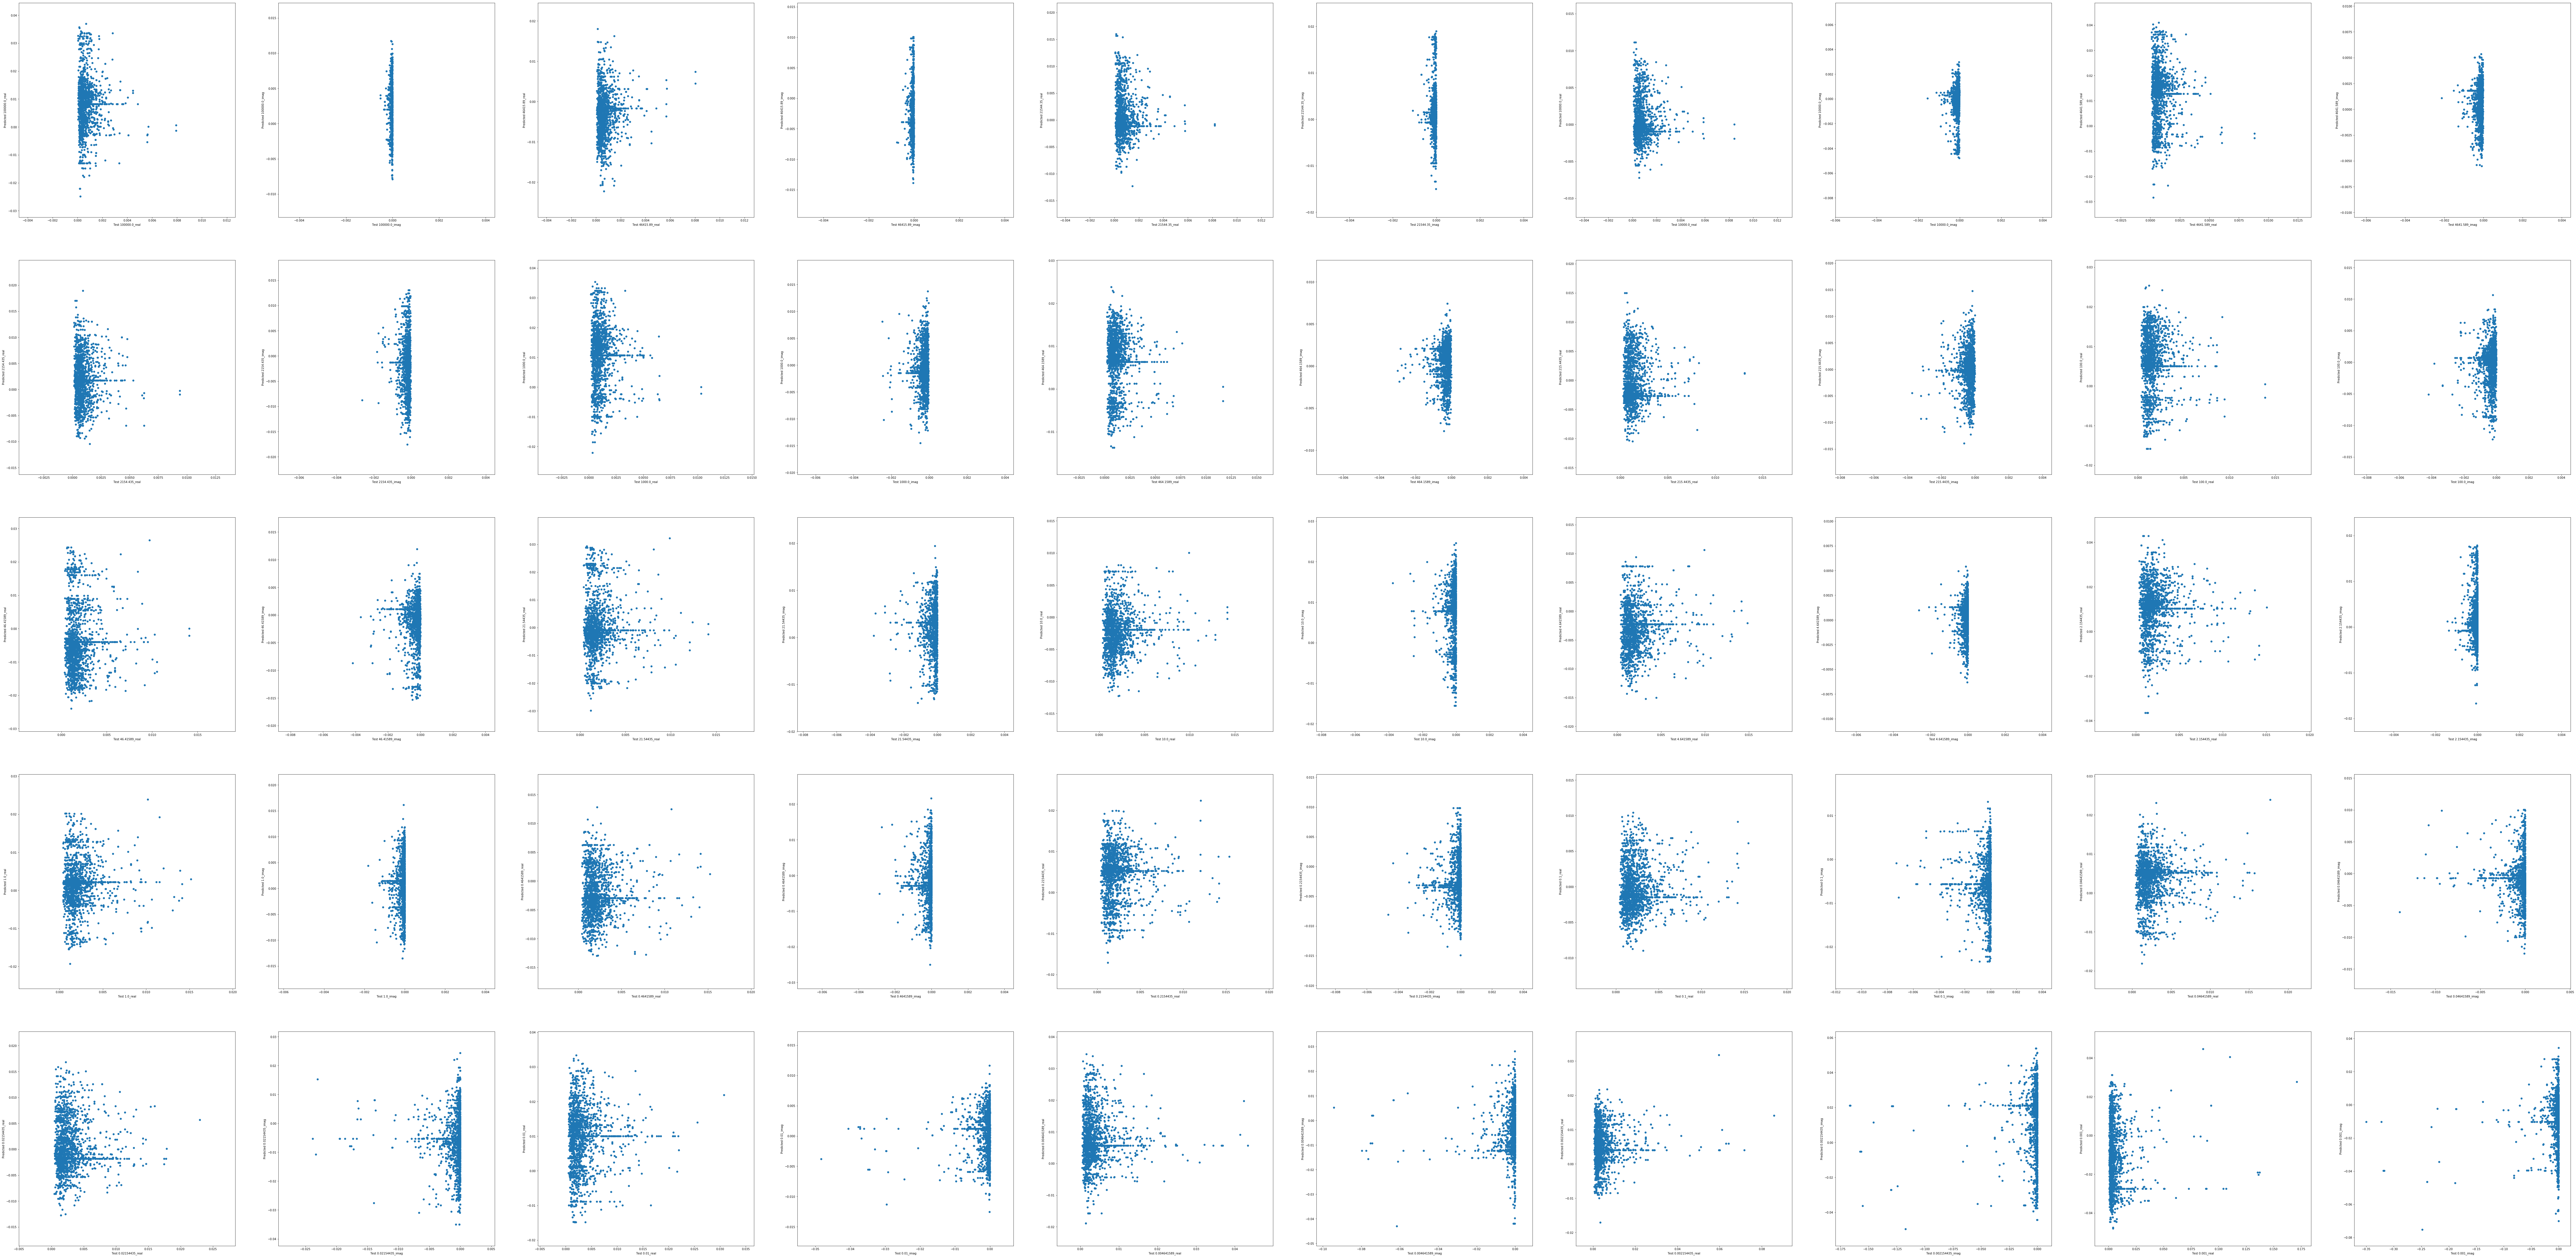

In [15]:
fig,axes = plt.subplots(nrows = 5, ncols = 10,figsize = [160,80] )
n = 0
for i in range(5):
    for j in range(10):
        axes[i,j].scatter(test_res_list[Y_var[n]],new_res_list[Y_var[n]])
        results = sm.OLS(new_res_list[Y_var[n]],sm.add_constant(test_res_list[Y_var[n]])).fit()
        print(results.rsquared_adj)
        axes[i,j].set_xlabel('Test '+Y_var[n])
        axes[i,j].set_ylabel('Predicted '+Y_var[n])
        n += 1

In [16]:
print(Y_test)

[[ 4.595440e-04 -3.672292e-05  4.769654e-04 ... -1.552162e-04
   1.856618e-03 -2.140222e-04]
 [ 1.236593e-03 -3.821771e-06  1.238394e-03 ... -4.574402e-05
   1.395662e-03 -7.510309e-05]
 [ 3.596416e-04 -7.275254e-06  3.630656e-04 ... -3.344556e-05
   6.886845e-04 -4.146401e-05]
 ...
 [ 7.452164e-04 -3.456792e-05  7.617397e-04 ... -4.308109e-03
   1.143807e-02 -4.774407e-03]
 [ 2.189923e-03 -5.976699e-05  2.218362e-03 ... -5.690578e-03
   1.412031e-02 -7.172635e-03]
 [ 5.817882e-04 -2.546350e-05  5.937214e-04 ... -3.123355e-06
   2.209090e-03 -4.962410e-06]]


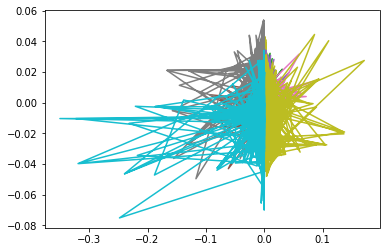

In [17]:
plt.plot(Y_test,Y_new)

/Users/wangyuening/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


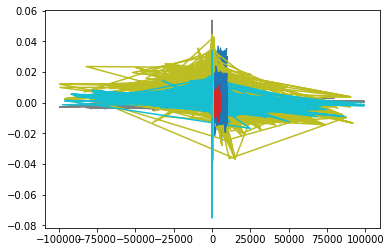

In [18]:
plt.plot(X_test,Y_new)

/Users/wangyuening/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


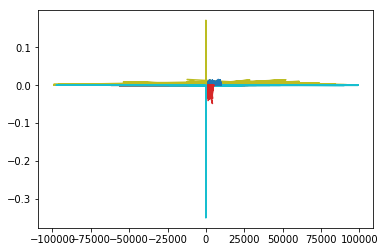

In [19]:
plt.plot(X_test,Y_test)

In [20]:
import plotly

In [21]:
layer_number = []
activation = []
nodes_number = []
R = []
with open("./Results/pd2s_results2.txt") as f:
    lines = f.readlines()
for l1 in lines[:1]:
    #print(l1.split())
    #print(len(l1.split()))
    a1 = l1.split()[3]
    a1 = a1[2:-1]
    n1 = l1.split()[4]
    n1 = int(n1[:-2])
    layer_number.append(1)
    activation.append(a1)
    nodes_number.append(n1)
    r = float(l1.split()[12])
    R.append(r)
    a2 = l1.split()[5]
    a2 = a2[1:-1]
    n2 = l1.split()[6]
    n2 = int(n2[:-2])
    r = float(l1.split()[12])
    R.append(r)
    layer_number.append(2)
    activation.append(a2)
    nodes_number.append(n2)    
    a3 = l1.split()[7]
    a3 = a3[1:-1]
    n3 = l1.split()[8]
    n3 = int(n3[:-2])
    r = float(l1.split()[12])
    R.append(r)
    layer_number.append(3)
    activation.append(a3)
    nodes_number.append(n3)
    a4 = l1.split()[9]
    a4 = a4[0:-2]
    layer_number.append(4)
    activation.append(a4)
    nodes_number.append(0)
    r = float(l1.split()[12])
    R.append(r)
    #print(a1,a2,a3,a4,n1,n2,n3,r)    
for l in lines[1:-1]:
    #print(l.split())
    #for i in range((len(l.split()))):
        #print(l.split()[i])
    a1 = l.split()[9]
    a1 = a1[2:-1]
    n1 = l.split()[10]
    n1 = int(n1[:-2])
    r = float(l.split()[len(l.split())-1])
    R.append(r)
    layer_number.append(1)
    activation.append(a1)
    nodes_number.append(n1)
    a2 = l.split()[11]
    a2 = a2[1:-1]
    n2 = l.split()[12]
    n2 = int(n2[:-2])
    r = float(l.split()[len(l.split())-1])
    R.append(r)
    layer_number.append(2)
    activation.append(a2)
    nodes_number.append(n2)    
    a3 = l.split()[13]
    a3 = a3[1:-1]
    n3 = l.split()[14]
    n3 = int(n3[:-2])
    r = float(l.split()[len(l.split())-1])
    R.append(r)
    layer_number.append(3)
    activation.append(a3)
    nodes_number.append(n3)
    a4 = l.split()[15]
    a4 = a4[0:-1]
    layer_number.append(4)
    activation.append(a4)
    nodes_number.append(0)
    #print(len(l.split()))
    r = float(l.split()[len(l.split())-1])
    R.append(r)
    #print(a1,a2,a3,a4,n1,n2,n3,r)
    
    
       
        
        

        

In [22]:
print(len(layer_number),len(activation),len(nodes_number),len(R))

6176 6176 6176 6176


In [23]:
import pandas as pd
df = pd.DataFrame({"layer_n":layer_number,"activation_func":activation,
                   "nodes_n":nodes_number,"R":R})

In [25]:
df.head()

,layer_n,activation_func,nodes_n,R
0,1,'tanh',18,0.13
1,2,'tanh',18,0.13
2,3,'tanh',18,0.13
3,4,'tanh',0,0.13
4,1,'tanh',18,-0.06


In [39]:
df1 = df[(df['layer_n']==1)]

In [43]:
df1 = df1.reset_index(drop=True)
df1.head()
df1 = df1.drop(['layer_n'],axis=1)

In [44]:
df2 = df[(df['layer_n']==2)]
df2 = df2.reset_index(drop=True)
df2 = df2.drop(['layer_n'],axis=1)

df3 = df[(df['layer_n']==3)]
df3 = df3.reset_index(drop=True)
df3 = df3.drop(['layer_n'],axis=1)

df4 = df[(df['layer_n']==4)]
df4 = df4.reset_index(drop=True)
df4 = df4.drop(['layer_n'],axis=1)

In [46]:
df1.head()

,activation_func,nodes_n,R
0,'tanh',18,0.13
1,'tanh',18,-0.06
2,'tanh',18,-0.07
3,'tanh',18,0.17
4,'tanh',50,0.21


In [63]:
layer1 = df1.groupby(['activation_func',"nodes_n"]).mean()
layer1=layer1.reset_index()
layer1.head()

,activation_func,nodes_n,R
0,'linear',100,-0.236547
1,'relu',18,0.095000
2,'relu',50,0.136667
3,'relu',100,0.021716
4,'tanh',18,0.114444


In [64]:
layer1.pivot('activation_func','nodes_n','R').head()

nodes_n,18,50,100
activation_func,,,
'linear',NaN,NaN,-0.236547
'relu',0.095000,0.136667,0.021716
'tanh',0.114444,-142.728813,-0.019412


In [65]:
layer1.pivot('activation_func','nodes_n')['R'].head()

nodes_n,18,50,100
activation_func,,,
'linear',NaN,NaN,-0.236547
'relu',0.095000,0.136667,0.021716
'tanh',0.114444,-142.728813,-0.019412


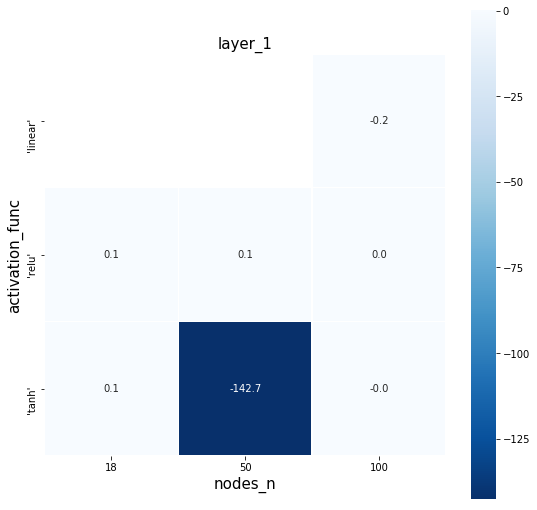

In [67]:
plt.figure(figsize=(9,9))
pivot_table = df1.pivot_table(index='activation_func',columns='nodes_n',values='R')
plt.xlabel('activation_func', size = 15)
plt.ylabel('nodes_n', size = 15)
plt.title('layer_1', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

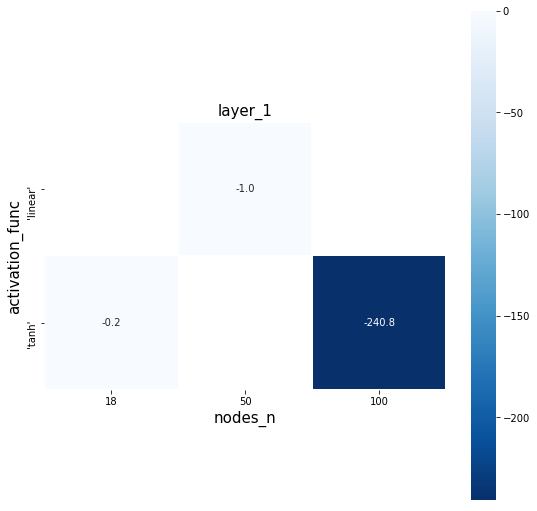

In [69]:
plt.figure(figsize=(9,9))
pivot_table = df2.pivot_table(index='activation_func',columns='nodes_n',values='R')
plt.xlabel('activation_func', size = 15)
plt.ylabel('nodes_n', size = 15)
plt.title('layer_1', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [1]:
from pycallgraph import PyCallGraph
from pycallgraph.output import GraphvizOutput


In [2]:
import model_simplified_search

Using TensorFlow backend.


In [12]:
data1 = {"filename":"synthetic_data.tsv","X_var":["A","B","C"],"Y_var":"y","proj_name":"syng"}
params = {"activation_functions":["tanh",'linear'],"hidden_layers":[1],"units":[5,18]}
graphviz = GraphvizOutput(output_file='model_search1.png')
#config = Config(max_depth=1)
with PyCallGraph(output=graphviz):
    max_param, max_R = model_simplified_search.model_search(data1,0.2,42,params)
    

32
total iteration left is 32
create input layer with activation of tanh and units of 5
create hidden layer 1 of activation tanh and units 5
create output layer with activation of tanh and units of 1

Epoch 00010: saving model to ./Results/syng_collection1/intermediate_output1/weights-10-0.50.hdf5

Epoch 00020: saving model to ./Results/syng_collection1/intermediate_output1/weights-20-0.50.hdf5
it already took 64.46 seconds
best R for the combination [['tanh', 5], ['tanh', 5], 'tanh'] with 1 hidden layer is 0.6305
{'layer_number': 1, 'starting_n': 1, 'best_R': 0.6304930589421659, 'best_param': [['tanh', 5], ['tanh', 5], 'tanh'], 'cumulative_time': 64.45682191848755}

total iteration left is 31
create input layer with activation of tanh and units of 5
create hidden layer 1 of activation tanh and units 5
create output layer with activation of linear and units of 1

Epoch 00010: saving model to ./Results/syng_collection1/intermediate_output2/weights-10-0.84.hdf5

Epoch 00020: saving model

create output layer with activation of tanh and units of 1

Epoch 00010: saving model to ./Results/syng_collection1/intermediate_output13/weights-10-0.48.hdf5

Epoch 00020: saving model to ./Results/syng_collection1/intermediate_output13/weights-20-0.51.hdf5
it already took 1188.94 seconds
best R for the combination [['tanh', 18], ['tanh', 18], 'linear'] with 1 hidden layer is 0.9642
{'layer_number': 1, 'starting_n': 13, 'best_R': 0.9642128932817009, 'best_param': [['tanh', 18], ['tanh', 18], 'linear'], 'cumulative_time': 1188.9405608177185}

total iteration left is 19
create input layer with activation of linear and units of 5
create hidden layer 1 of activation tanh and units 18
create output layer with activation of linear and units of 1

Epoch 00010: saving model to ./Results/syng_collection1/intermediate_output14/weights-10-0.87.hdf5

Epoch 00020: saving model to ./Results/syng_collection1/intermediate_output14/weights-20-0.87.hdf5
it already took 1305.72 seconds
best R for the co

create output layer with activation of tanh and units of 1

Epoch 00010: saving model to ./Results/syng_collection1/intermediate_output25/weights-10-0.51.hdf5

Epoch 00020: saving model to ./Results/syng_collection1/intermediate_output25/weights-20-0.55.hdf5
it already took 3104.90 seconds
best R for the combination [['tanh', 18], ['tanh', 18], 'linear'] with 1 hidden layer is 0.9642
{'layer_number': 1, 'starting_n': 25, 'best_R': 0.9642128932817009, 'best_param': [['tanh', 18], ['tanh', 18], 'linear'], 'cumulative_time': 3104.900280714035}

total iteration left is 7
create input layer with activation of tanh and units of 5
create hidden layer 1 of activation linear and units 18
create output layer with activation of linear and units of 1

Epoch 00010: saving model to ./Results/syng_collection1/intermediate_output26/weights-10-0.77.hdf5

Epoch 00020: saving model to ./Results/syng_collection1/intermediate_output26/weights-20-0.84.hdf5
it already took 3265.78 seconds
best R for the comb